<a href="https://colab.research.google.com/github/Krishnadayal/Data-Science-Project-Lifecycle/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving train_data (2).csv to train_data (2).csv


In [ ]:
train_data = pd.read_csv("/content/train_data (2).csv")
train_data.head()

,customer_id,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
train_data.dtypes

,0
customer_id,float64
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,int64


In [ ]:
train_data.drop(["customer_id"], axis = 1, inplace = True)
train_data.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,Kelaniya,1209.60,756.00,5292.00,4
1,Moratuwa,1590.12,1060.08,6007.12,1
2,Wattala,2288.88,1481.04,9155.52,4
3,Wattala,2274.94,1739.66,9099.76,4
4,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
mapping = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5}
train_data["cluster_category"] = train_data["cluster_category"].map(mapping)

In [ ]:
train_data["outlet_city"] = train_data["outlet_city"].astype("category")

In [ ]:
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [ ]:
print(x)

       outlet_city  luxury_sales  fresh_sales  dry_sales
0         Kelaniya       1209.60       756.00    5292.00
1         Moratuwa       1590.12      1060.08    6007.12
2          Wattala       2288.88      1481.04    9155.52
3          Wattala       2274.94      1739.66    9099.76
4         Kelaniya       2345.49      2069.55    9243.99
...            ...           ...          ...        ...
774144     Gampaha       3893.40      3893.40    3448.44
774145  Katunayake       6095.86      5557.99    6275.15
774146     Colombo       5121.42      4820.16    4669.53
774147       Kandy       6311.76      6311.76    5940.48
774148     Negombo       5833.50      6027.95    6611.30

[774149 rows x 4 columns]


In [ ]:
print(y)

0         3
1         0
2         3
3         3
4         3
         ..
774144    2
774145    2
774146    2
774147    2
774148    2
Name: cluster_category, Length: 774149, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
print(x_train)

         outlet_city  luxury_sales  fresh_sales  dry_sales
632740       Gampaha       1691.84      6568.32    1293.76
89392       Homagama       1328.16       996.12    5561.67
585860      Kalmunai       3021.38     10972.38    2067.26
708515   Trincomalee       1508.80      5129.92     980.72
70065     Peliyagoda       1987.47      1286.01    8183.70
...              ...           ...          ...        ...
259178      Kelaniya       1510.44      8810.90    2517.40
365838      Moratuwa       5132.05      4985.42    4545.53
131932  Nuwara Eliya       1979.04      1458.24    6874.56
671155       Gampaha       1823.76      7295.04    1072.80
121958      Panadura       1075.80       591.69    3657.72

[580611 rows x 4 columns]


In [ ]:
print(x_test)

        outlet_city  luxury_sales  fresh_sales  dry_sales
321727      Wattala        883.74      4622.64    1155.66
211672     Panadura       1446.72      8680.32    2630.40
472683     Kalmunai       1215.28      1657.20    7623.12
66176      Moratuwa       1295.06      1142.70    5104.06
344661   Peliyagoda       4676.70      4676.70    4814.25
...             ...           ...          ...        ...
638724        Kandy       2090.70      7898.20    1393.80
82635    Peliyagoda       1987.65      1325.10    8613.15
575909   Katunayake       3774.54     13310.22    2781.24
106366   Peliyagoda        877.71       722.82    3355.95
616657  Trincomalee       2199.42      8186.73    1588.47

[193538 rows x 4 columns]


In [ ]:
print(y_train)

632740    5
89392     3
585860    5
708515    5
70065     3
         ..
259178    1
365838    4
131932    3
671155    5
121958    3
Name: cluster_category, Length: 580611, dtype: int64


In [ ]:
print(y_test)

321727    1
211672    1
472683    0
66176     3
344661    4
         ..
638724    5
82635     3
575909    5
106366    3
616657    5
Name: cluster_category, Length: 193538, dtype: int64


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(enable_categorical = True, max_depth = 5, learning_rate = 0.03,
                           n_estimators = 200, reg_alpha = 1, reg_lambda = 1, subsample = 0.7,
                           colsample_bytree = 0.7)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
print(classifier.predict(rc.transform([[1691.84, 6568.32, 1293.76]])))

[6]


In [ ]:
y_pred = classifier.predict(x_test)
comparision = pd.DataFrame({"Actual Cluster Category":y_test, "Predicted Cluster Category": y_pred})
comparision.head(10)

,Actual Cluster Category,Predicted Cluster Category
321727,1,1
211672,1,1
472683,0,0
66176,3,3
344661,4,4
261351,1,1
518030,0,0
101177,3,3
504304,0,0
293142,1,1


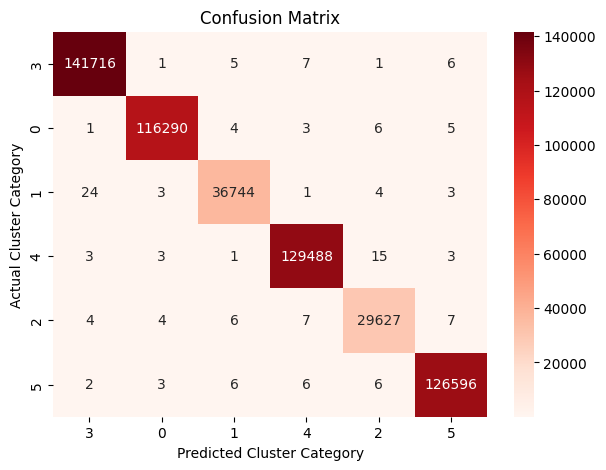

XGBoost Train Model Accuracy: 0.9997416514671613


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
x_pred = classifier.predict(x_train)

cm_train = confusion_matrix(y_train, x_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_train, annot = True, fmt = "d", cmap = "Reds", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"XGBoost Train Model Accuracy: {accuracy_score(y_train, x_pred)}")

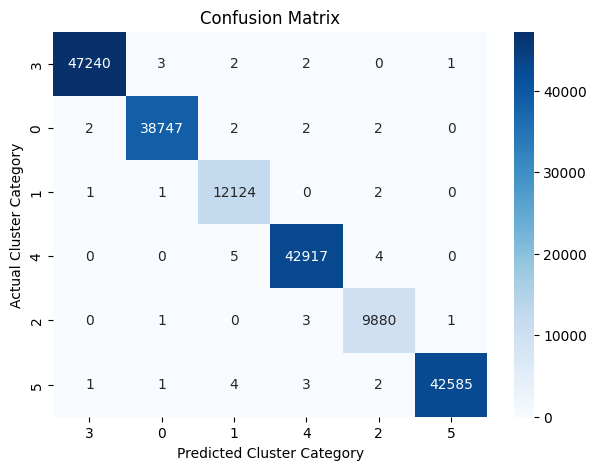

XGBoost Test Model Accuracy: 0.9997674875218303


In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_test, annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"XGBoost Test Model Accuracy: {accuracy_score(y_test, y_pred)}")

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Total Error: {:.2f}%".format((1 - accuracies).mean()*100))

Accuracy: 99.97%
Standard Deviation: 0.01%
Total Error: 0.03%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47248
           1       1.00      1.00      1.00     38755
           2       1.00      1.00      1.00     12128
           3       1.00      1.00      1.00     42926
           4       1.00      1.00      1.00      9885
           5       1.00      1.00      1.00     42596

    accuracy                           1.00    193538
   macro avg       1.00      1.00      1.00    193538
weighted avg       1.00      1.00      1.00    193538



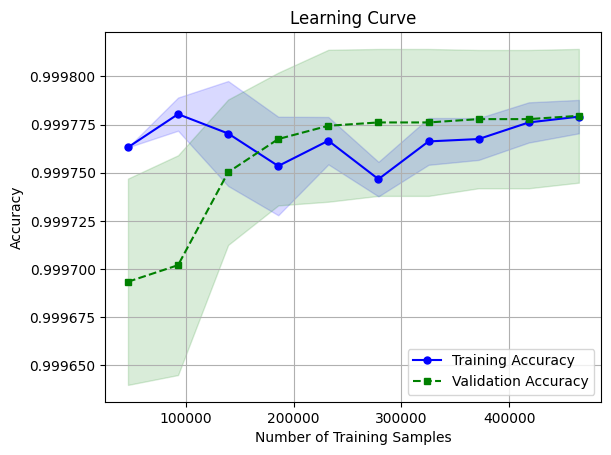

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=classifier,
                                                        X = x_train, y = y_train, cv = 5,
                                                        scoring = 'accuracy',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize = 5, label = 'Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc = 'lower right')
plt.show()

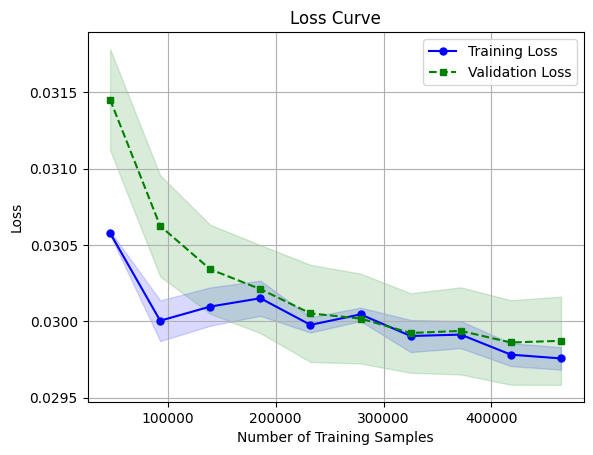

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = x_train,
                                                        y = y_train, cv = 5, scoring = 'neg_log_loss',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = -np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = -np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(loc = 'upper right')
plt.show()

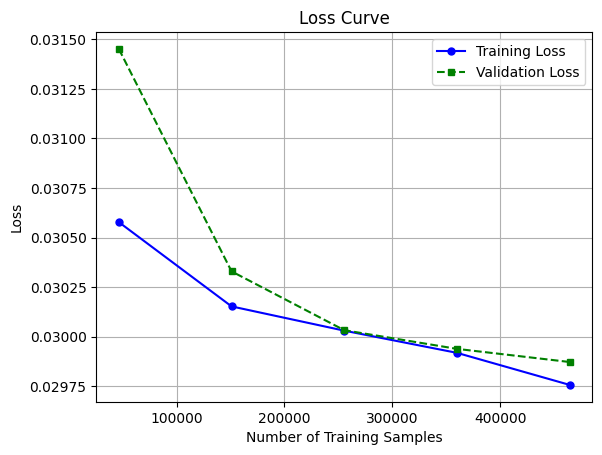

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = x_train,
                                                        y = y_train, cv = 5, scoring = 'neg_log_loss',
                                                        n_jobs = -1)

train_mean = -np.mean(train_scores, axis = 1)
test_mean = -np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Loss')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Loss')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=classifier.classes_)
n_classes = y_test_bin.shape[1]

# Create an OneVsRestClassifier
classifier_ovr = OneVsRestClassifier(classifier)
classifier_ovr.fit(x_train, y_train)

# Predict probabilities for each class
y_score = classifier_ovr.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(7, 5))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw=2,
             label = 'ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classifier.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc = "lower right")
plt.show()

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.